In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


def plot_prediction_nifti(
    nii_path,
    out_png=None,
    percentile=99.5,
    cmap="hot"
):
    """
    Plot MELD prediction NIfTI (float heatmap).

    Parameters
    ----------
    nii_path : str or Path
        Path to prediction_*.nii.gz
    out_png : str or Path or None
        Where to save PNG (if None → same folder)
    percentile : float
        Upper percentile for visualization scaling
    cmap : str
        Matplotlib colormap
    """

    nii_path = Path(nii_path)
    img = nib.load(str(nii_path))
    data = img.get_fdata()

    # remove NaNs
    data = np.nan_to_num(data)

    # scaling for visualization
    nonzero = data[data > 0]
    if nonzero.size == 0:
        vmax = 1.0
    else:
        vmax = np.percentile(nonzero, percentile)

    # center of mass of prediction
    if nonzero.size > 0:
        coords = np.argwhere(data > vmax * 0.3)
        center = coords.mean(axis=0).astype(int)
    else:
        center = np.array(data.shape) // 2

    x, y, z = center

    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    plt.suptitle(nii_path.name, fontsize=12)

    slices = [
        (data[x, :, :], "Sagittal"),
        (data[:, y, :], "Coronal"),
        (data[:, :, z], "Axial"),
    ]

    for ax, (sl, title) in zip(axes, slices):
        im = ax.imshow(
            np.rot90(sl),
            cmap=cmap,
            vmin=0,
            vmax=vmax
        )
        ax.set_title(title)
        ax.axis("off")

    cbar = fig.colorbar(im, ax=axes, fraction=0.025)
    cbar.set_label("Prediction score")

    plt.tight_layout()

    if out_png is None:
        out_png = nii_path.with_suffix("").with_suffix(".png")

    plt.savefig(out_png, dpi=150)
    plt.close(fig)

    print(f"✓ Saved NIfTI visualization: {out_png}")


/tmp/ipykernel_1787753/3416269866.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


PermissionError: [Errno 13] Permission denied: '/home/mikhelson/FCD-Detection/meld_graph/data/output/predictions_reports/MELD/MELD_H101_3T_FCD_00043/predictions/prediction_MELD_H101_3T_FCD_00043.png'

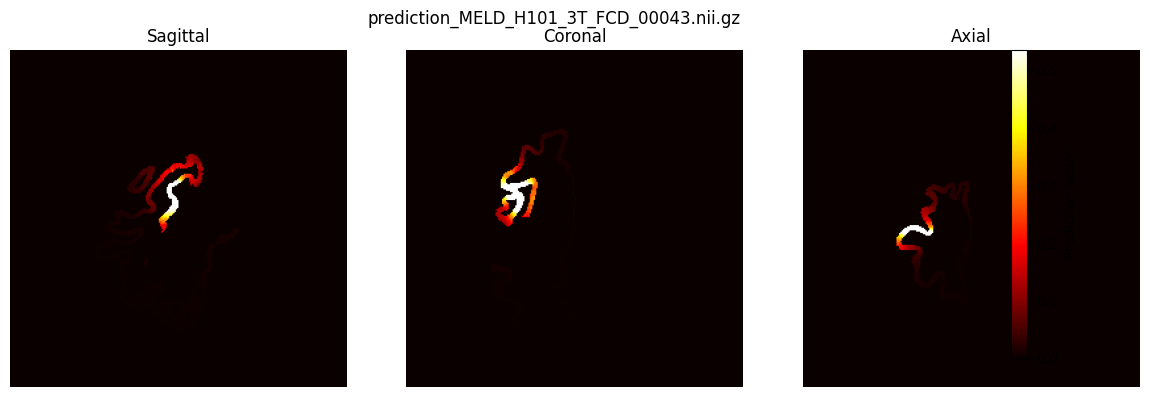

In [2]:
plot_prediction_nifti(
    "/home/mikhelson/FCD-Detection/meld_graph/data/output/"
    "predictions_reports/MELD/MELD_H101_3T_FCD_00043/"
    "predictions/prediction_MELD_H101_3T_FCD_00043.nii.gz"
)
